# Be central!

I'll give each one of you 5 outgoing edges and 2 incoming edges. Multi-edges are not allowed. There should be only one edge with the same origin and target. The goal is to negotiate with others so that you have the highest centralities. 

There are four challenges:

- In-degree
- PageRank
- Betweenness centrality
- Closeness centrality

The name of your node is your first name (lowercase). 

In [5]:
firstnames = ['peiying','sam','clara','jeff','adam','kenzie','sikander','wanying','sina','shubhi','danielle',\
             'justin','nils','chris','john','yang','becca','elham','miguel', 'thomas']

edge_str = """
peiying chris 
peiying justin
peiying miguel
peiying sikander
peiying jeff
thomas peiying
peiying danielle
shubhi sam
justin sam
sam jeff
sam becca 
sam john
sam wanying
sam kenzie
clara justin
clara nils
clara kenzie
clara thomas
clara adam
peiying clara
danielle clara
jeff justin
jeff peiying
jeff yang
jeff shubhi
sam jeff
jeff miguel
jeff danielle
kenzie jeff
nils adam
sina adam
adam sam
adam clara
adam danielle
adam shubhi
adam john
danielle kenzie
thomas kenzie
kenzie adam
kenzie clara
kenzie becca
kenzie wanying
sikander sam
sikander kenzie
sikander danielle
sikander thomas
sikander jeff
yang sikander
wanying justin
wanying clara
wanying sam
wanying elham
wanying nils
sam wanying
jeff wanying
sina adam
sina elham
sina danielle
sina justin
sam sina
miguel sina
shubhi yang
shubhi justin
shubhi john
shubhi thomas
shubhi elham
chris shubhi
jeff shubhi
miguel danielle
justin danielle
danielle sam
danielle jeff
danielle elham
danielle yang
danielle kenzie
justin clara
justin wanying
justin nils
justin jeff
justin elham
sam justin
john justin
nils sam
nils john 
nils clara
nils becca
nils kenzie
thomas nils
adam nils
miguel chris
peiying chris
chris miguel
chris peiying
chris yang
chris jeff
chris shubhi
john miguel
john elham
john sam
john justin
john clara
danielle john
shubhi john
yang john
yang thomas
yang sikander
yang jeff
yang chris
shubhi yang
jeff yang
thomas becca
kenzie becca
becca nils
becca sam
becca john
becca adam
becca justin
elham miguel
elham john
elham sina
elham justin
elham wanying
shubhi elham
danielle elham
miguel john
miguel chris
miguel peiying
miguel jeff
miguel elham
justin miguel
sikander miguel
thomas becca
thomas kenzie
thomas adam
thomas sikander
thomas wanying
shubhi thomas
clara thomas

"""

edge_list = [x.split() for x in edge_str.strip().splitlines()]
edge_list

[['peiying', 'chris'],
 ['peiying', 'justin'],
 ['peiying', 'miguel'],
 ['peiying', 'sikander'],
 ['peiying', 'jeff'],
 ['thomas', 'peiying'],
 ['peiying', 'danielle'],
 ['shubhi', 'sam'],
 ['justin', 'sam'],
 ['sam', 'jeff'],
 ['sam', 'becca'],
 ['sam', 'john'],
 ['sam', 'wanying'],
 ['sam', 'kenzie'],
 ['clara', 'justin'],
 ['clara', 'nils'],
 ['clara', 'kenzie'],
 ['clara', 'thomas'],
 ['clara', 'adam'],
 ['peiying', 'clara'],
 ['danielle', 'clara'],
 ['jeff', 'justin'],
 ['jeff', 'peiying'],
 ['jeff', 'yang'],
 ['jeff', 'shubhi'],
 ['sam', 'jeff'],
 ['jeff', 'miguel'],
 ['jeff', 'danielle'],
 ['kenzie', 'jeff'],
 ['nils', 'adam'],
 ['sina', 'adam'],
 ['adam', 'sam'],
 ['adam', 'clara'],
 ['adam', 'danielle'],
 ['adam', 'shubhi'],
 ['adam', 'john'],
 ['danielle', 'kenzie'],
 ['thomas', 'kenzie'],
 ['kenzie', 'adam'],
 ['kenzie', 'clara'],
 ['kenzie', 'becca'],
 ['kenzie', 'wanying'],
 ['sikander', 'sam'],
 ['sikander', 'kenzie'],
 ['sikander', 'danielle'],
 ['sikander', 'thomas'],
 

In [6]:
import networkx as nx
G = nx.DiGraph(edge_list)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 118
Average in degree:   5.9000
Average out degree:   5.9000


# Consistency test

In [7]:
# namespace test
for u,v in edge_list:
    if u not in firstnames or v not in firstnames:
        print('{}, {}: some names are wrong'.format(u, v))

# In-degree

In [8]:
for n, deg in sorted(G.in_degree(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:<10}'.format(n, deg))

justin     10        
jeff       9         
sam        9         
john       9         
clara      8         
miguel     7         
danielle   7         
elham      7         
wanying    6         
kenzie     6         
nils       6         
adam       6         
peiying    4         
thomas     4         
becca      4         
yang       4         
chris      3         
sikander   3         
shubhi     3         
sina       3         


# PageRank

In [9]:
pr = nx.pagerank(G)
for n, p in sorted(pr.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, p))

justin     0.090499
sam        0.074158
clara      0.073432
john       0.071736
elham      0.063690
jeff       0.063676
miguel     0.058313
nils       0.057081
wanying    0.057060
adam       0.054048
danielle   0.053388
kenzie     0.050233
becca      0.036971
sina       0.034413
thomas     0.031630
peiying    0.030106
yang       0.029470
shubhi     0.026841
chris      0.023247
sikander   0.020007


# Betweenness centrality

In [10]:
betw = nx.algorithms.betweenness_centrality(G)
for n, b in sorted(betw.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, b))

jeff       0.102060
justin     0.095788
miguel     0.085623
sam        0.080210
clara      0.072179
danielle   0.064501
thomas     0.062000
adam       0.050492
john       0.050427
yang       0.040156
peiying    0.039207
shubhi     0.029055
wanying    0.027299
elham      0.026510
nils       0.026025
kenzie     0.023741
sikander   0.016674
sina       0.013127
chris      0.011764
becca      0.010063


# Closeness centrality

In [11]:
cl = nx.algorithms.closeness_centrality(G)
for n, c in sorted(cl.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, c))

justin     0.678571
jeff       0.655172
sam        0.655172
john       0.655172
clara      0.633333
miguel     0.612903
danielle   0.612903
elham      0.612903
wanying    0.593750
kenzie     0.558824
nils       0.558824
adam       0.558824
shubhi     0.500000
peiying    0.487179
thomas     0.487179
sina       0.487179
becca      0.475000
yang       0.463415
chris      0.441860
sikander   0.413043


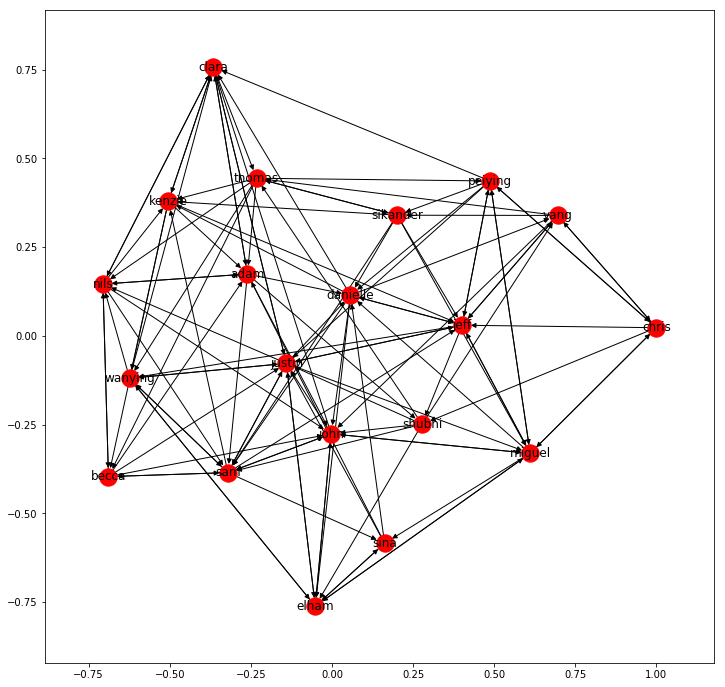

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure(figsize=(12,12))
nx.draw_networkx(G, with_labels=True)